In [ ]:
import pickle
from struct import unpack
import gzip
import numpy as np

from RBM import RBM

#Dataset
f = gzip.open("../data/mnist.pkl.gz", "rb")
data = pickle.load(f,encoding='bytes')
f.close()
(x_train, y_train), (x_test, y_test) = data
#x_train = x_train.reshape(x_train.shape[0],x_train.shape[1]*x_train.shape[2])
# x = x_train[0].reshape(1,784)


"""Training of Restricted Boltzmann Machine"""

model = RBM(n_visible=28*28, n_hidden=144, lr=0.1, l2_coeff=1e-4, momentum_coff=0.5)

training_epochs = 5
batch_size = 1
for epoch in range(training_epochs):
    # index = 0
    img_num = 60000
    cost = 0
    for i in range(img_num):
        x = x_train[i].reshape(1,784)
        cost += model.const_divergence(x/255.0, K=5)

    cost = cost/img_num
    print('Training epoch %d, cost is ' % epoch, cost)

In [40]:
"""Plotting and Testing of Restricted Boltzmann Machine"""
number = 44
visible = x_train[number].reshape(1,784)
prob_h_given_v, h_sample = model.sample_h_given_v(visible)
prob_v_given_hk, v_sample_k = model.sample_v_given_h(h_sample)
# x = v_sample_k.reshape(28,28)
x = prob_v_given_hk.reshape(28,28)

def img_frombytes(data):
    size = data.shape[::-1]
    databytes = np.packbits(data, axis=1)
    return Image.frombytes(mode='1', size=size, data=databytes)

# from PIL import Image
# img1 = Image.fromarray(x_train[number])
# img1.save("train.png")

# img = img_frombytes(x)
# img.save('my.png')
# img.show()

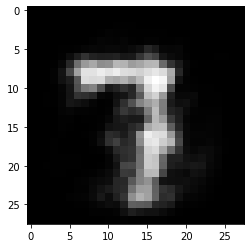

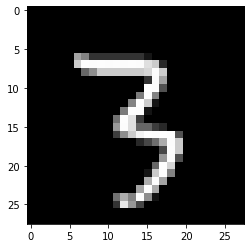

In [41]:
import matplotlib.pyplot as plt
plt.imshow(x,cmap="gray")
plt.show()
plt.imshow(x_train[number], cmap="gray")
plt.show()